In [2]:
import pandas as pd 
import numpy as np

In [3]:
def load_and_process(path_to_csv):
    
    df = (
    	pd.read_csv(path_to_csv)
    	.loc[lambda x: x['STOLEN_VALUE']>1000]
        .drop(['ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'POPULATION_GROUP_CODE', 'OFFENSE_CODE', 'VICTIM_TYPE_CODE', 'LOCATION_CODE', 'WEAPON_CODE', 'PROP_DESC_ID', 'PROP_DESC_CODE'], axis=1)
   		.sort_values("DATA_YEAR", ascending = True)
   		.rename(columns={
   			"COUNTY_NAME" : "County Name",
   			"POPULATION_GROUP_DESC": "Population Description", 
   			"REGION_NAME" : "Region Name",
   			"DATA_YEAR" : "Year",
   			"STATE_NAME" : "State",
   			"DIVISION_NAME" : "Division",
   			"COUNTY_NAME" : "County",
   			"REGION_NAME" : "Region",
   			"OFFENSE_NAME" : "Offense",
   			"OFFENDER_RACE" : "Offender Race",
   			"OFFENDER_ETHNICITY" : "Offender Ethnicity",
   			"OFFENDER_AGE" : "Offender Age",
   			"OFFENDER_SEX" : "Offender Sex",
   			"VICTIM_TYPE_NAME" : "Victim Type",
   			"LOCATION_NAME" : "Location",
   			"WEAPON_NAME" : "Weapon",
   			"PROP_DESC_NAME" : "Property Type",
   			"STOLEN_VALUE" : "Stolen Value",
   			"RECOVERED_VALUE" : "Recovered Value",
   			"RECOVERED_FLAG" : "Recovered?",
   			"DATE_RECOVERED" : "Recovery Date"
		})
    )
    
    
    return df



df=load_and_process("../../Dataset.csv")
df

,Year,State,Division,County,Region,Population Description,Offense,Offender Race,Offender Ethnicity,Offender Age,Offender Sex,Victim Type,Location,Weapon,Property Type,Stolen Value,Recovered Value,Recovered?,Recovery Date
45880,2013,Virginia,South Atlantic,NEWPORT NEWS CITY,South,"Cities from 100,000 thru 249,999",All Other Larceny,NaN,NaN,NaN,NaN,Individual,Parking/Drop Lot/Garage,NaN,Consumable Goods,3000.0,0.0,N,NaN
38924,2013,Tennessee,East South Central,SULLIVAN; CARTER; WASHINGTON,South,"Cities from 50,000 thru 99,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Money,2000.0,0.0,N,NaN
38736,2013,Florida,South Atlantic,MIAMI-DADE,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Commercial/Office Building,NaN,Radio/ TV/ VCR,6576.0,0.0,N,NaN
38214,2013,Tennessee,East South Central,SHELBY,South,"Cities from 500,000 thru 999,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Commercial/Office Building,NaN,Radio/ TV/ VCR,1200.0,0.0,N,NaN
38213,2013,Tennessee,East South Central,SHELBY,South,"Cities from 500,000 thru 999,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Other/Unknown,NaN,Radio/ TV/ VCR,4000.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65096,2019,New Mexico,Mountain,BERNALILLO,West,"Cities from 500,000 thru 999,999",All Other Larceny,White,Hispanic or Latino,30.0,M,Business,Auto Dealership New/Used,NaN,Recreational/ Sports Equipment,33000.0,33000.0,Y,27-Apr-19
65095,2019,New Mexico,Mountain,BERNALILLO,West,"Cities from 500,000 thru 999,999",All Other Larceny,White,Hispanic or Latino,NaN,M,Business,Auto Dealership New/Used,NaN,Recreational/ Sports Equipment,33000.0,33000.0,Y,27-Apr-19
65094,2019,North Carolina,South Atlantic,IREDELL,South,"MSA counties 100,000 or over",All Other Larceny,White,Not Hispanic or Latino,45.0,M,Business,Commercial/Office Building,NaN,Other,1024.0,0.0,N,NaN
28068,2019,North Carolina,South Atlantic,GUILFORD,South,"Cities from 250,000 thru 499,999",Motor Vehicle Theft,White,Unknown,24.0,M,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,24-May-19


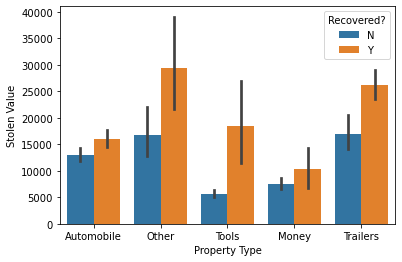

In [9]:


def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame)
    
    
#this one wont work quite yet until data is cleaned
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen Value",data=dataFrame)
    
    
#theft_by_area(df)
#averages_values_stolen_by_area(df)

def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    unique5_items=dataframe["Property Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property Type",data=dataframe,order=unique5_items)
    


def average_value_top_5_stolen(datframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    unique5_items=df["Property Type"].value_counts().iloc[:5].index
    average_top_5=sns.barplot(x="Property Type",y="Stolen Value",hue="Recovered?",data=df,order=unique5_items)

theft_by_area(df)
averages_values_stolen_by_area(df)
top_5_stolen(df)
average_value_top_5_stolen(df)



